In [ ]:
'''
✅ ?) Make k-regular graph
✅ ?) Couple graphs arbitrarily with l-additional degrees
✅ 5) Couple variable sized QL bits
✅ 1) Make full cartesian product 
✅) Visualize with nx.spring method while keeping Graphs separate
✅) Couple graphs specifying nodes to connect, i.e. subgraphs to connect (G_a1,1 to G_a1,2 ...)
✅) Make contracted product
✅) Compare eigenvalues and eigenvectors - Looks good, value of contracted single cartesian are 1/2 that of full cartesian
✅) automate contraction (copy full QL-bit and connect G_a1 to G_a1 ...)

7) Scaling of optimized contracted product (numerical study) For (N=16, k=11) (N=12, k=8), ...
8) Eigenvalue and eigenvector tracking during interated product / Can swap many cartesian prod for smaller graph, 
especially as N grows > 10?
8.5) Useful example simulated by cartesian, contracted, alternate graph
9) Iterated contracted product with non-uniform edges
10) Below exponential scaling in QL bits with iterated contraction while presevering quantum properties for simulation
10.5) Witness QL bit steering states, swap gates for external coupling, entanglement?

10.75) Topological computing...whole other project

11) Witness bits <-> TN contraction?...whole other project
11.5) TN mapping to contracted cartesian product with max eigenvectors kept. 

12) Dynamical systems study with non uniform edges, different QL graphs, pinch points...whole other project

13) Expander codes on full and contracted system...whole other project
'''

'\n✅ ?) Make k-regular graph\n✅ ?) Couple graphs arbitrarily with l-additional degrees\n✅ 5) Couple variable sized QL bits\n✅ 1) Make full cartesian product \n✅) Visualize with nx.spring method while keeping Graphs separate\n✅) Couple graphs specifying nodes to connect, i.e. subgraphs to connect (G_a1,1 to G_a1,2 ...)\n✅) Make contracted product\n✅) Compare eigenvalues and eigenvectors - Looks good, value of contracted single cartesian are 1/2 that of full cartesian\n✅) automate contraction (copy full QL-bit and connect G_a1 to G_a1 ...)\n\n7) Scaling of optimized contracted product (numerical study)\n8) Eigenvalue and eigenvector tracking during interated product / Can swap many cartesian prod for smaller graph, \nespecially as N grows > 20? Call it iterated contraction\n\n8.5) Useful example simulated by cartesian, iterated contraction, contracted\n9) Iterated contracted product with non-uniform edges\n10) Below exponential scaling in QL bits with iterated contraction while preseveri

In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
from k_regular_graph_generator import generate_multiple_k_regular_graphs
from quantumlike_bit_generator import *
from eigenvalue_analysis import *
from bell_state_generation import *

np.set_printoptions(threshold=1500)

In [74]:
###  1) Make full cartesian product 
N = 6
k = 3
l = 1

k_reg_adj_mats = generate_multiple_k_regular_graphs(N, k, 4)
k_reg_adj_mats

graph_info = {
    'subgraph_size': N,
    'subgraph_degree': k,
    'coupling_degree': l,
    'total_size': 2 * N,
    'total_degree_per_node': k + l,
    'total_edges': np.sum(k_reg_adj_mats) // 2,
    'coupling_edges': N * l
}


In [75]:
ql_bit_matrix1 = couple_graphs_random(k_reg_adj_mats[0], k_reg_adj_mats[1], l)
ql_bit_matrix2 = couple_graphs_random(k_reg_adj_mats[2], k_reg_adj_mats[3], l)

identity_matrix = np.eye(2*N, dtype=int)
cart_prod = np.kron(ql_bit_matrix1, identity_matrix) + np.kron(identity_matrix, ql_bit_matrix2)

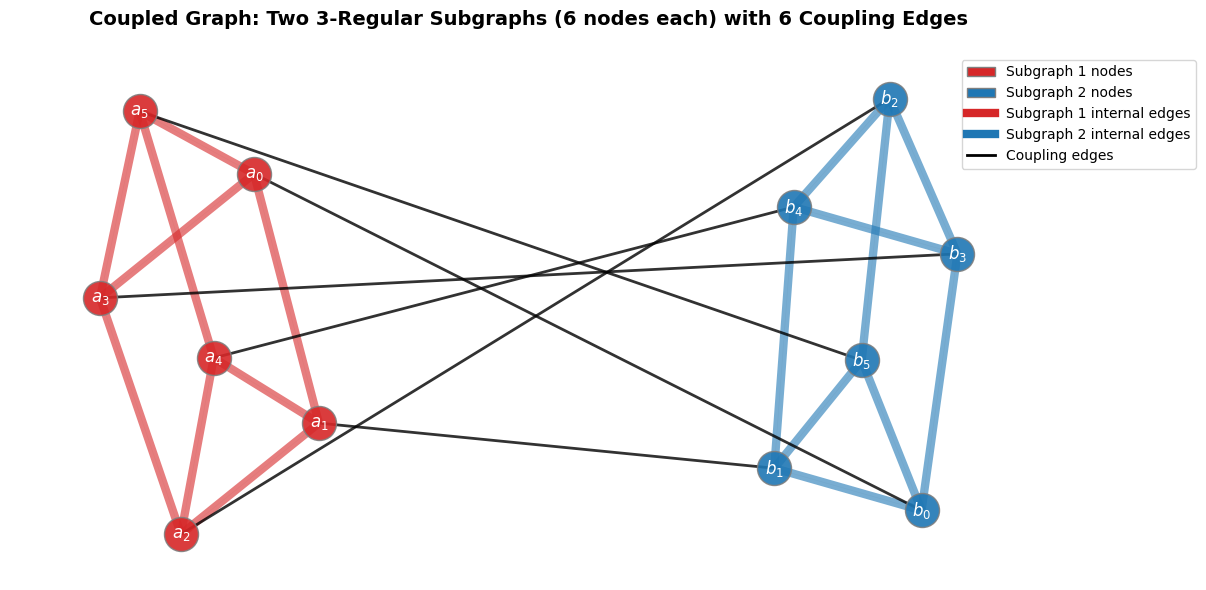

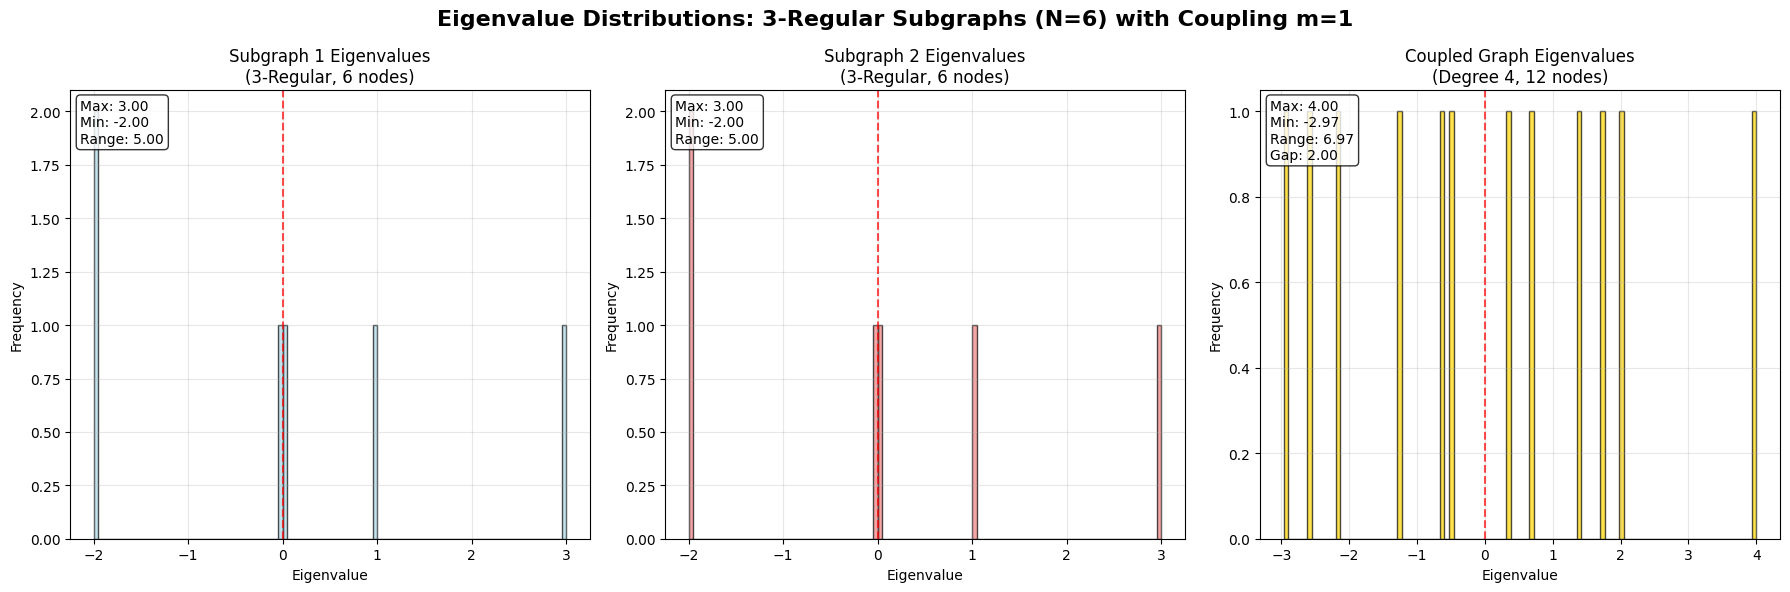

(<Figure size 1800x600 with 3 Axes>,
 (array([ 3.00000000e+00,  1.00000000e+00,  7.93908219e-16, -2.73147513e-16,
         -2.00000000e+00, -2.00000000e+00]),
  array([ 3.00000000e+00,  1.00000000e+00,  2.37540631e-16, -4.49715921e-16,
         -2.00000000e+00, -2.00000000e+00]),
  array([ 4.        ,  2.        ,  1.72348005,  1.3893733 ,  0.6676979 ,
          0.36680281, -0.52194807, -0.60563533, -1.29200453, -2.18522666,
         -2.57722536, -2.96531412])))

In [76]:
graph_info = {
    'subgraph_size': N,
    'subgraph_degree': k,
    'coupling_degree': l,
    'total_size': 2 * N,
    'total_degree_per_node': k + l,
    'total_edges': np.sum(ql_bit_matrix2) // 2,
    'coupling_type': 'full',
    'coupling_edges': N * l
}

# visualize_ql_bit(ql_bit_matrix2, graph_info);
# visualize_ql_bit(ql_bit_matrix1, graph_info);
visualize_ql_bit(ql_bit_matrix2, graph_info);
visualize_eigenvalue_distribution(ql_bit_matrix2, graph_info)


Creating QL-bit 1...
Creating QL-bit 2...
Each QL-bit is 24x24

Custom coupling between ql-bits:
  Node 0 (ql-bit 1) → Nodes [0] (ql-bit 2)
  Node 1 (ql-bit 1) → Nodes [1] (ql-bit 2)
  Node 2 (ql-bit 1) → Nodes [2] (ql-bit 2)
  Node 3 (ql-bit 1) → Nodes [3] (ql-bit 2)
  Node 4 (ql-bit 1) → Nodes [4] (ql-bit 2)
  Node 5 (ql-bit 1) → Nodes [5] (ql-bit 2)
  Node 6 (ql-bit 1) → Nodes [6] (ql-bit 2)
  Node 7 (ql-bit 1) → Nodes [7] (ql-bit 2)
  Node 8 (ql-bit 1) → Nodes [8] (ql-bit 2)
  Node 9 (ql-bit 1) → Nodes [9] (ql-bit 2)
  Node 10 (ql-bit 1) → Nodes [10] (ql-bit 2)
  Node 11 (ql-bit 1) → Nodes [11] (ql-bit 2)
  Node 12 (ql-bit 1) → Nodes [12] (ql-bit 2)
  Node 13 (ql-bit 1) → Nodes [13] (ql-bit 2)
  Node 14 (ql-bit 1) → Nodes [14] (ql-bit 2)
  Node 15 (ql-bit 1) → Nodes [15] (ql-bit 2)
  Node 16 (ql-bit 1) → Nodes [16] (ql-bit 2)
  Node 17 (ql-bit 1) → Nodes [17] (ql-bit 2)
  Node 18 (ql-bit 1) → Nodes [18] (ql-bit 2)
  Node 19 (ql-bit 1) → Nodes [19] (ql-bit 2)
  Node 20 (ql-bit 1) → 

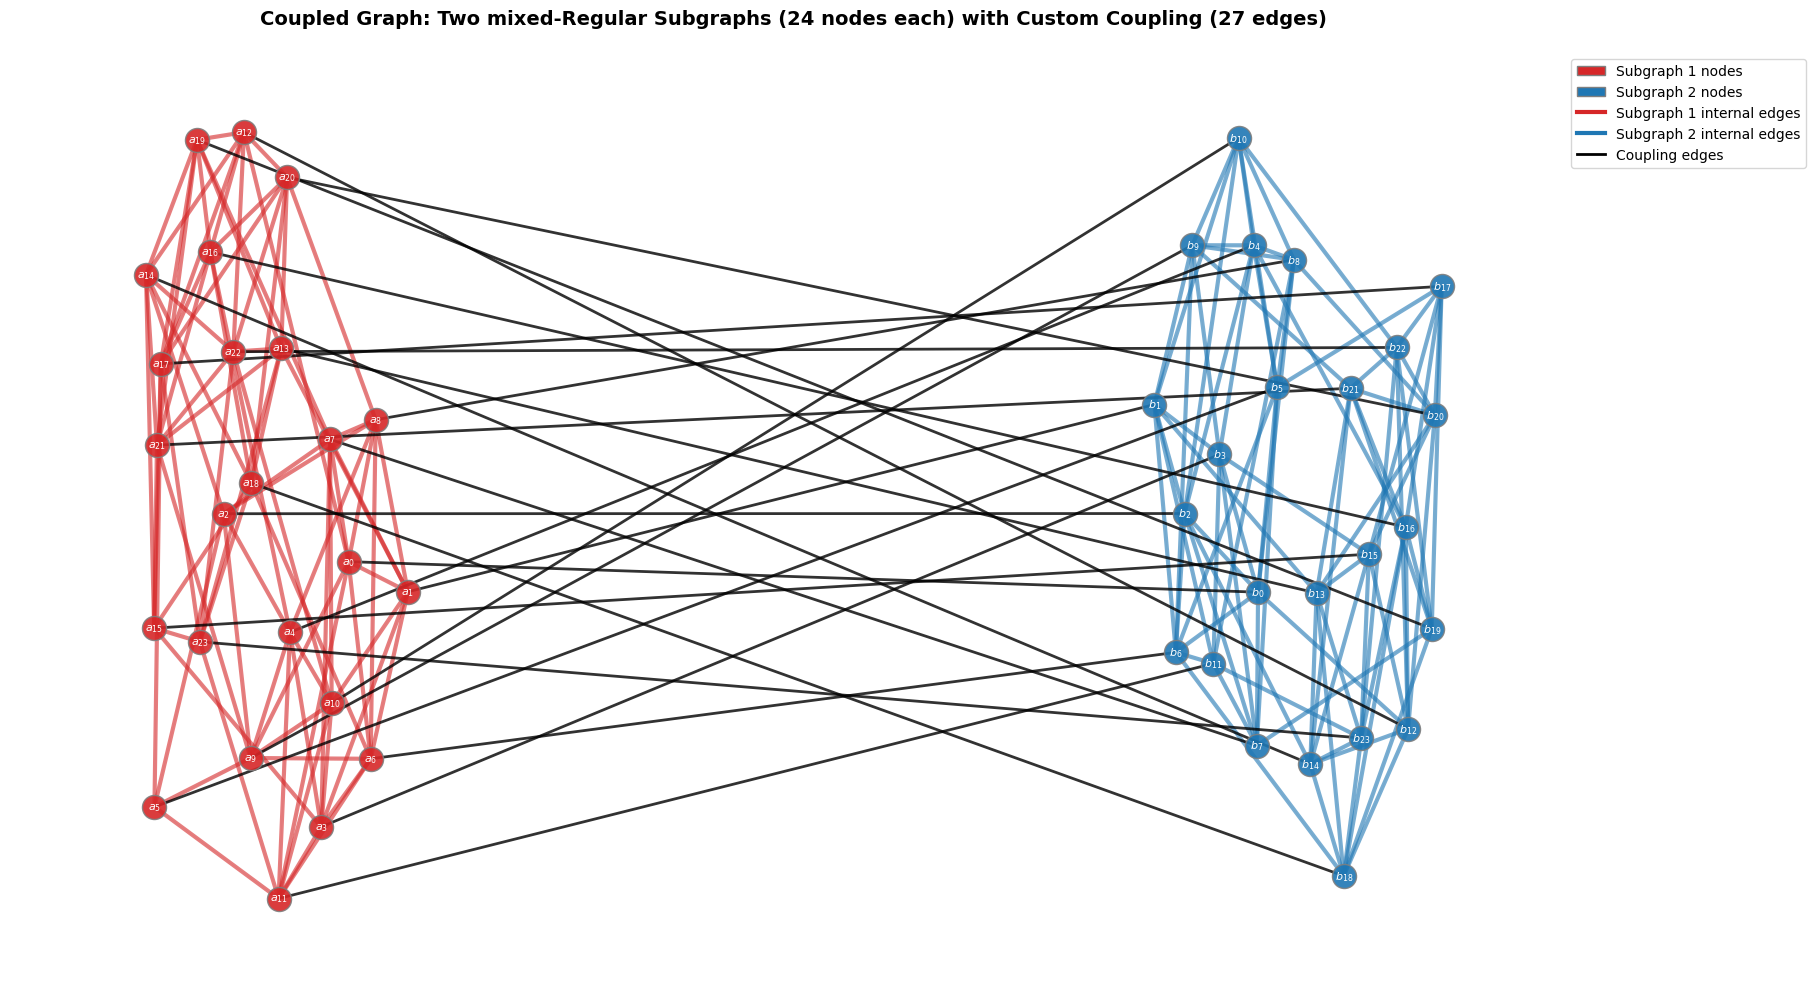

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create two individual ql-bits
print("Creating QL-bit 1...")
ql_bit1_matrix, ql_bit1_info = generate_ql_bit(N=12, k=6, coupling_spec=1)

print("Creating QL-bit 2...")  
ql_bit2_matrix, ql_bit2_info = generate_ql_bit(N=12, k=6, coupling_spec=1)

print(f"Each QL-bit is {ql_bit1_matrix.shape[0]}x{ql_bit1_matrix.shape[1]}")

# Step 2: Define custom coupling between the two ql-bits
# Goal: Connect matching subgraphs to matching subgraphs
# - Subgraph 1a (nodes 0,1) ↔ Subgraph 2a (nodes 0,1 in ql-bit 2)
# - Subgraph 1b (nodes 2,3) ↔ Subgraph 2b (nodes 2,3 in ql-bit 2)

# ql_bit_coupling = {
#     # Subgraph 1a to Subgraph 2a connections
#     0: [0],
#     1: [1],   
#     2: [2],
#     3: [3],
#     4: [4],
#     5: [5],
#     6: [6],
#     7: [7],
#     8: [8],
#     9: [9],
# }

ql_bit_coupling = {}
for i in range(24):
    ql_bit_coupling[i] = [i]

print(f"\nCustom coupling between ql-bits:")
for source, targets in ql_bit_coupling.items():
    print(f"  Node {source} (ql-bit 1) → Nodes {targets} (ql-bit 2)")

# Step 3: Couple the two ql-bits
print(f"\nCoupling the two ql-bits...")
coupled_ql_bits_matrix = couple_graphs_custom(ql_bit1_matrix, ql_bit2_matrix, ql_bit_coupling)

print(f"Combined system is {coupled_ql_bits_matrix.shape[0]}x{coupled_ql_bits_matrix.shape[1]}")
print(f"Final node mapping:")
print(f"  Nodes 0,1: Subgraph 1a (ql-bit 1)")
print(f"  Nodes 2,3: Subgraph 1b (ql-bit 1)") 
print(f"  Nodes 4,5: Subgraph 2a (ql-bit 2)")
print(f"  Nodes 6,7: Subgraph 2b (ql-bit 2)")

# Step 4: Create graph info for visualization
combined_graph_info = {
    'subgraph_size': 24,  # Each "subgraph" is now a full ql-bit
    'subgraph_degree': 'mixed',  
    'coupling_degree': 'custom',
    'coupling_type': 'custom',
    'coupling_spec': ql_bit_coupling,
    'total_size': 48,
    'total_edges': np.sum(coupled_ql_bits_matrix) // 2,
    'coupling_edges': np.sum(coupled_ql_bits_matrix[:4, 4:]),
    'internal_edges_per_subgraph': np.sum(ql_bit1_matrix) // 2
}

fig = visualize_ql_bit(coupled_ql_bits_matrix, combined_graph_info, show_plot=True)


Sampling 50 bell state instances with N=16, k=11, l=1
Generated 10/50 samples...
Generated 20/50 samples...
Generated 30/50 samples...
Generated 40/50 samples...
Generated 50/50 samples...
\nCollected 51,200 bell state eigenvalues from 50 samples


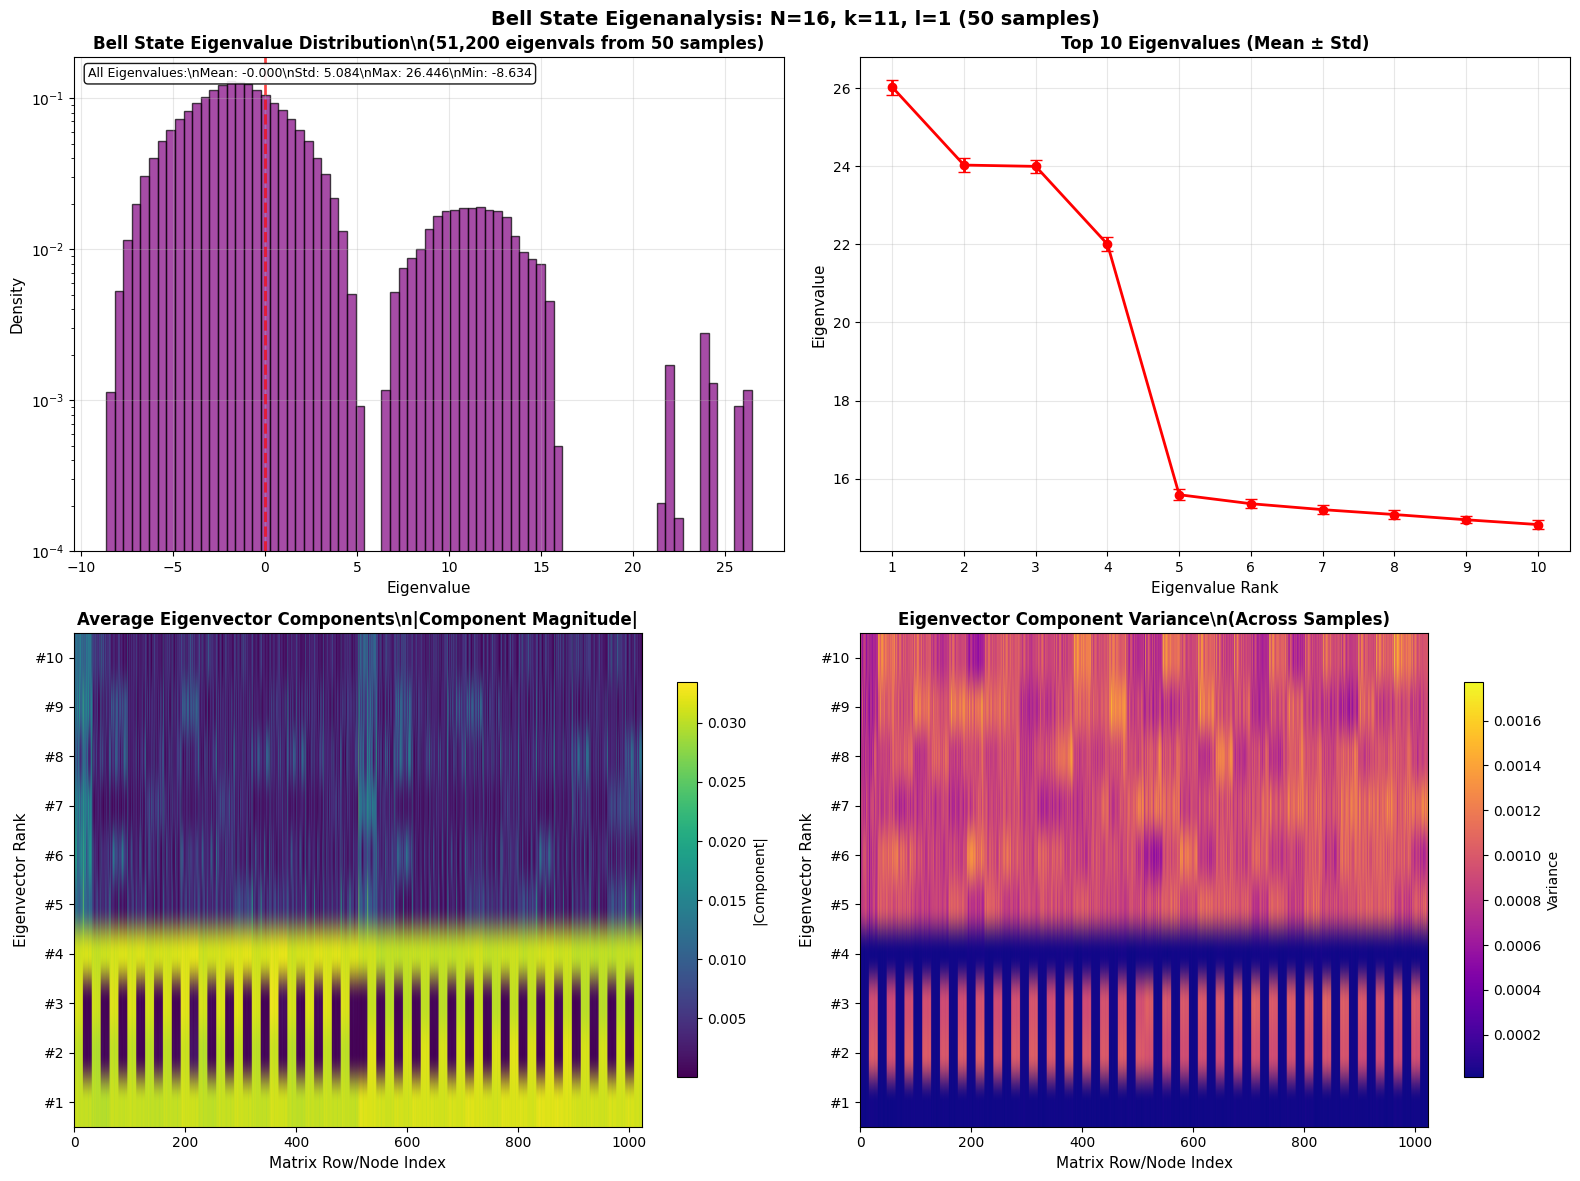

\n============================================================
TOP 10 EIGENVALUES (Mean ± Standard Deviation)
Rank  1:  26.0249 ± 0.1893
Rank  2:  24.0306 ± 0.1883
Rank  3:  23.9972 ± 0.1748
Rank  4:  22.0029 ± 0.1748
Rank  5:  15.5901 ± 0.1411
Rank  6:  15.3602 ± 0.1201
Rank  7:  15.2082 ± 0.1204
Rank  8:  15.0831 ± 0.1202
Rank  9:  14.9488 ± 0.0932
Rank 10:  14.8268 ± 0.1085
\n============================================================
EIGENVECTOR ANALYSIS SUMMARY
Matrix size: 1024 x 1024
Top eigenvectors kept: 10
Samples averaged: 50
\nMost significant components (top 3 eigenvectors):
\nEigenvector #1 (eigenvalue: 26.0249):
  Top components: [index: value]
    [835:  0.0328]
    [837:  0.0328]
    [867:  0.0328]
    [515:  0.0327]
    [707:  0.0326]
\nEigenvector #2 (eigenvalue: 24.0306):
  Top components: [index: value]
    [856: -0.0327]
    [888: -0.0326]
    [849: -0.0326]
    [881: -0.0326]
    [852: -0.0325]
\nEigenvector #3 (eigenvalue: 23.9972):
  Top components: [index: va

In [20]:
# Get all the data including raw eigenvector samples
all_eigenvals, (avg_eigenvals, std_eigenvals), avg_eigenvecs, raw_eigenvec_samples = sample_bell_state_distributions(N=16, k=11, l=1, M=50)

# Analyze stability
stability_metrics = analyze_eigenvector_stability(raw_eigenvec_samples, top_k=10)

# Print results
for vec_rank, metrics in stability_metrics.items():
    print(f"Eigenvector #{vec_rank+1}:")
    print(f"  Average correlation: {metrics['avg_correlation']:.3f}")
    print(f"  Minimum correlation: {metrics['min_correlation']:.3f}")
    print(f"  Correlation std: {metrics['correlation_std']:.3f}")
    print()

In [53]:
# Parameters
M = 100  # Number of samples
N = 7
k = 6
num_coupling_iterations = 5
all_coupled_eigenvalues = []
all_top_5_eigenvalues = []
all_top_5_eigenvectors = []

print(f"Sampling {M} coupled ql-bit systems with {num_coupling_iterations} coupling iterations...")

for sample in range(M):
    if (sample + 1) % 10 == 0:
        print(f"Generated {sample + 1}/{M} samples...")
    
    # Step 1: Create two individual ql-bits
    ql_bit1_matrix, ql_bit1_info = generate_ql_bit(N=N, k=k, coupling_spec=5)
    ql_bit2_matrix, ql_bit2_info = generate_ql_bit(N=N, k=k, coupling_spec=5)
    
    # Step 2: Start with initial coupling
    ql_bit_coupling = {}
    for i in range(N * 2):
        ql_bit_coupling[i] = [i]
    
    # Step 3: Initial coupling of the two ql-bits
    coupled_matrix = couple_graphs_custom(ql_bit1_matrix, ql_bit2_matrix, ql_bit_coupling)
    
    # Step 4: Loop for additional coupling iterations
    for iteration in range(num_coupling_iterations - 1):  # -1 because we already did the first coupling
        current_size = coupled_matrix.shape[0]
        
        # Create coupling dictionary for current matrix size
        ql_bit_coupling = {}
        for i in range(current_size):
            ql_bit_coupling[i] = [i]
        # Couple current matrix with itself
        coupled_matrix = couple_graphs_custom(coupled_matrix, coupled_matrix, ql_bit_coupling)
    
    # Step 5: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(coupled_matrix)

    # eigh returns eigenvalues in ascending order, reverse for largest first
    sorted_eigenvalues = eigenvalues[::-1][:10]  # Take top 10
    sorted_eigenvectors = eigenvectors[:, ::-1][:, :5]  # Take top 5 eigenvectors
    
    # Store results
    all_coupled_eigenvalues.extend(eigenvalues)
    all_top_5_eigenvalues.append(sorted_eigenvalues)
    all_top_5_eigenvectors.append(sorted_eigenvectors)

# Convert to numpy arrays
all_coupled_eigenvalues = np.array(all_coupled_eigenvalues)
all_top_5_eigenvalues = np.array(all_top_5_eigenvalues)
all_top_5_eigenvectors = np.array(all_top_5_eigenvectors)

# Fix eigenvector sign consistency for averaging
for sample_idx in range(M):
    for vec_idx in range(5):
        eigenvec = all_top_5_eigenvectors[sample_idx, :, vec_idx]
        first_nonzero_idx = np.argmax(np.abs(eigenvec) > 1e-10)
        if eigenvec[first_nonzero_idx] < 0:
            all_top_5_eigenvectors[sample_idx, :, vec_idx] *= -1

# Compute averages
avg_top_5_eigenvalues = np.mean(all_top_5_eigenvalues, axis=0)
std_top_5_eigenvalues = np.std(all_top_5_eigenvalues, axis=0)
avg_top_5_eigenvectors = np.mean(all_top_5_eigenvectors, axis=0)

print(f"\nFinal matrix size after {num_coupling_iterations} iterations: {coupled_matrix.shape[0]}x{coupled_matrix.shape[1]}")

Sampling 100 coupled ql-bit systems with 5 coupling iterations...
Generated 10/100 samples...
Generated 20/100 samples...
Generated 30/100 samples...
Generated 40/100 samples...
Generated 50/100 samples...
Generated 60/100 samples...
Generated 70/100 samples...
Generated 80/100 samples...
Generated 90/100 samples...
Generated 100/100 samples...

Final matrix size after 5 iterations: 448x448


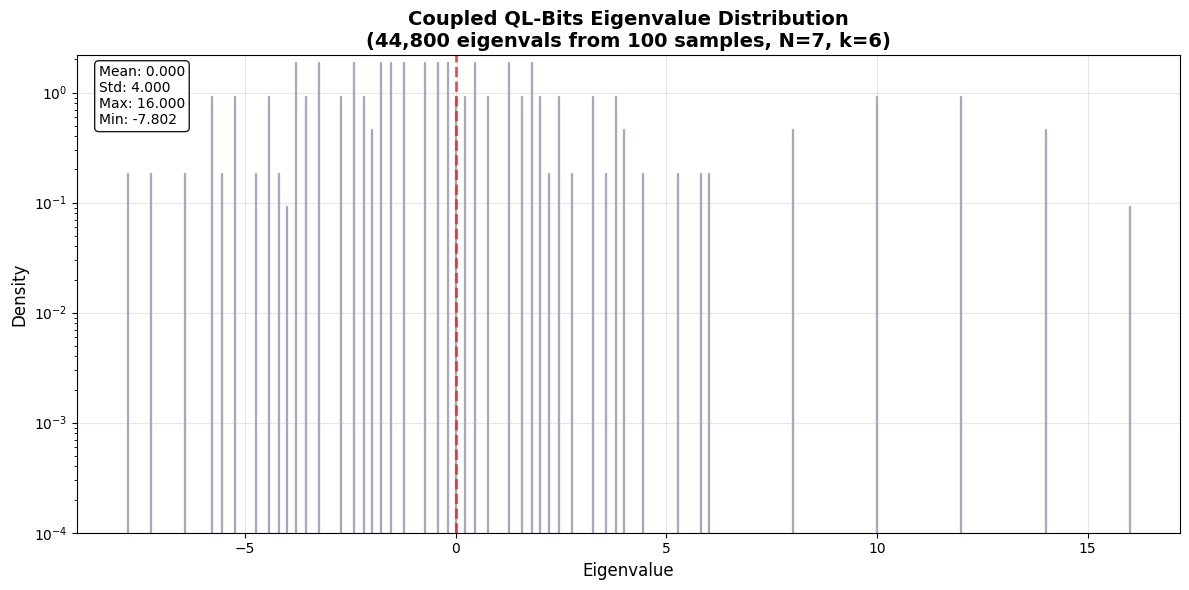


Collected 44,800 eigenvalues from 100 coupled ql-bit systems
Each system was 448x448

TOP 5 EIGENVALUES (Mean ± Standard Deviation)
Rank 1:  16.0000 ± 0.0000
Rank 2:  14.0000 ± 0.0000
Rank 3:  14.0000 ± 0.0000
Rank 4:  14.0000 ± 0.0000
Rank 5:  14.0000 ± 0.0000
Rank 6:  14.0000 ± 0.0000
Rank 7:  12.0000 ± 0.0000
Rank 8:  12.0000 ± 0.0000
Rank 9:  12.0000 ± 0.0000
Rank 10:  12.0000 ± 0.0000

TOP 5 EIGENVECTORS - ALL COMPONENTS

Eigenvector #1 (eigenvalue: 16.0000):
All components:
  [  0:  0.04725]
  [  1:  0.04725]
  [  2:  0.04725]
  [  3:  0.04725]
  [  4:  0.04725]
  [  5:  0.04725]
  [  6:  0.04725]
  [  7:  0.04725]
  [  8:  0.04725]
  [  9:  0.04725]
  [ 10:  0.04725]
  [ 11:  0.04725]
  [ 12:  0.04725]
  [ 13:  0.04725]
  [ 14:  0.04725]
  [ 15:  0.04725]
  [ 16:  0.04725]
  [ 17:  0.04725]
  [ 18:  0.04725]
  [ 19:  0.04725]
  [ 20:  0.04725]
  [ 21:  0.04725]
  [ 22:  0.04725]
  [ 23:  0.04725]
  [ 24:  0.04725]
  [ 25:  0.04725]
  [ 26:  0.04725]
  [ 27:  0.04725]
  [ 28:  0

In [54]:
# Plot eigenvalue distribution
plt.figure(figsize=(12, 6))
plt.hist(all_coupled_eigenvalues, bins=1000, alpha=0.25, color='blue', 
         edgecolor='black', density=True)
plt.title(f'Coupled QL-Bits Eigenvalue Distribution\n({len(all_coupled_eigenvalues):,} eigenvals from {M} samples, N={N}, k={k})', 
         fontsize=14, fontweight='bold')
plt.xlabel('Eigenvalue', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.ylim(bottom=1e-4)
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)

# Add statistics
stats_text = f'Mean: {np.mean(all_coupled_eigenvalues):.3f}\nStd: {np.std(all_coupled_eigenvalues):.3f}\nMax: {np.max(all_coupled_eigenvalues):.3f}\nMin: {np.min(all_coupled_eigenvalues):.3f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nCollected {len(all_coupled_eigenvalues):,} eigenvalues from {M} coupled ql-bit systems")
print(f"Each system was {coupled_matrix.shape[0]}x{coupled_matrix.shape[1]}")

print("\n" + "="*50)
print("TOP 5 EIGENVALUES (Mean ± Standard Deviation)")
print("="*50)
for i, (mean_val, std_val) in enumerate(zip(avg_top_5_eigenvalues, std_top_5_eigenvalues)):
    print(f"Rank {i+1}: {mean_val:8.4f} ± {std_val:6.4f}")

print("\n" + "="*60)
print("TOP 5 EIGENVECTORS - ALL COMPONENTS")
print("="*60)
for vec_idx in range(5):
    eigenvec = avg_top_5_eigenvectors[:, vec_idx]
    print(f"\nEigenvector #{vec_idx+1} (eigenvalue: {avg_top_5_eigenvalues[vec_idx]:.4f}):")
    print("All components:")
    for idx, component in enumerate(eigenvec):
        print(f"  [{idx:3d}: {component:8.5f}]")



## Eigenvalue hierarchical build

From Quantum information with quantumlike bits use convolution method in section B.2 
to calculate cartesian product spectra for any sized prodcut graph. Use individual QL-bit 
spectra and eigenvalues to hierarchically determine eigenvalues of the full cartesian product, 
know that the spectrum can be expressed as $ λ_{i} = λ^{(1)}_{j} + λ^{(2)}_{k}$ , where the $λ^{(q)}_{m}$ are eigenvalues of $R^{(q)}$.


$$
  \rho(\lambda) = \int_{-\infty}^{+\infty} dx \rho^{(1)}(x) \rho^{(2)}(\lambda - x)
$$

Multi-Sample Convolution Spectrum Analysis
Generating 10 samples with N=6, k=3, l=1
Processing sample 10/10...
Lambda range: [-8.59, 14.00]
Computing convolution integrals...


/var/folders/kz/_z8xk68n3g5bxpxhzpg1180c0000gn/T/ipykernel_73646/128859079.py:103: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = integrate.quad(integrand, x_min, x_max, limit=50)


  Convolution for sample 10/10...
Convolution completed for all 10 samples!

Top 10 peaks in averaged convolved spectrum:
  Peak 1: λ ≈ 1.0211, height = 0.1964
  Peak 2: λ ≈ -0.9913, height = 0.1641
  Peak 3: λ ≈ -0.3356, height = 0.1562
  Peak 4: λ ≈ -0.5843, height = 0.1559
  Peak 5: λ ≈ -1.5792, height = 0.1499
  Peak 6: λ ≈ 3.0109, height = 0.1487
  Peak 7: λ ≈ -1.9636, height = 0.1485
  Peak 8: λ ≈ 1.4281, height = 0.1453
  Peak 9: λ ≈ 0.4106, height = 0.1371
  Peak 10: λ ≈ 0.7271, height = 0.1364


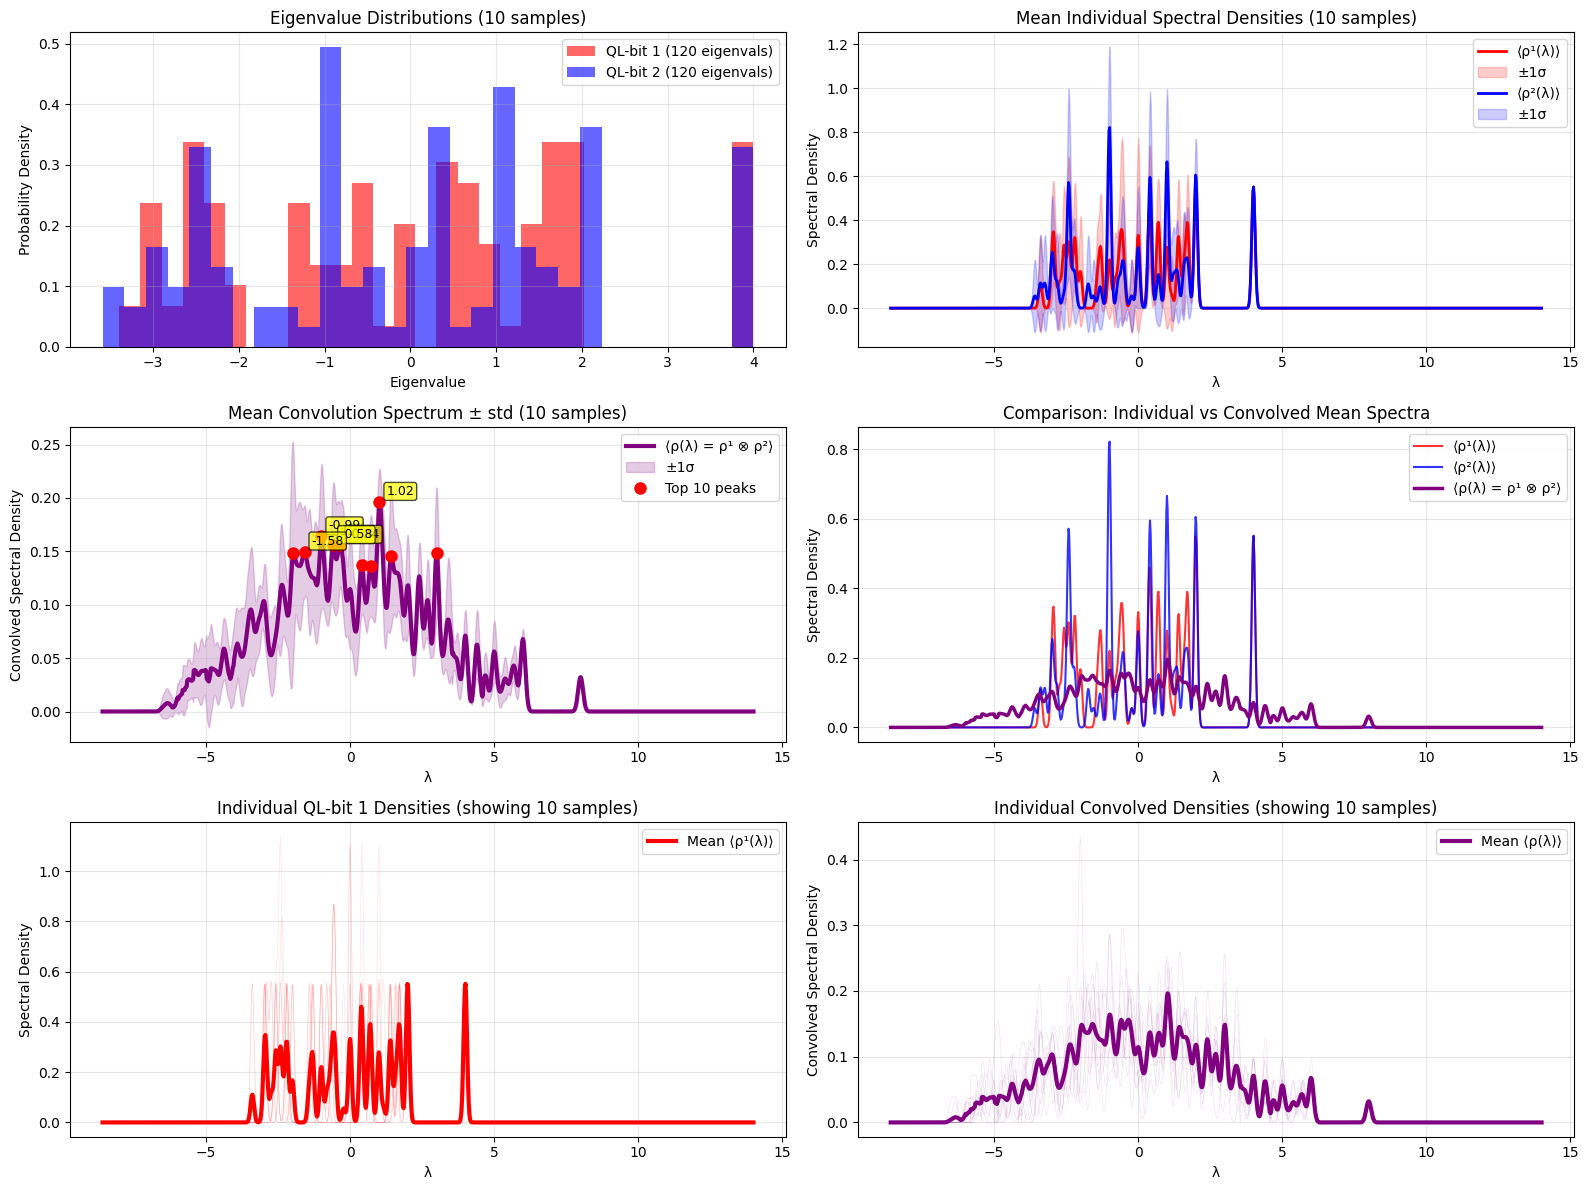


Statistical Summary:
Mean spectral radius QL-bit 1: 4.0000 ± 0.0000
Mean spectral radius QL-bit 2: 4.0000 ± 0.0000
Mean convolved spectrum maximum: 0.2546
Convolution variability (std/mean): 1.3177

Peak Statistics Analysis:
Average number of peaks per sample: 30.20 ± 3.22
Total peaks found across all samples: 302
Peak location range: [-6.395, 8.008]


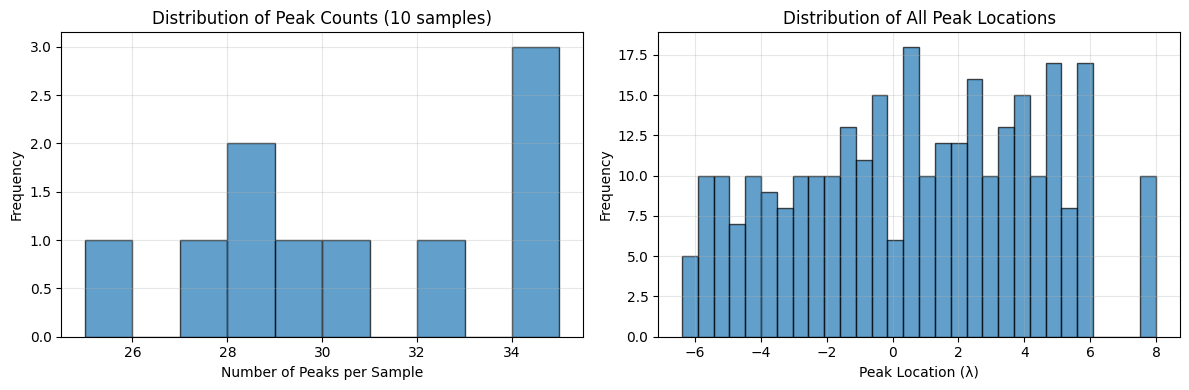

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks

def calculate_multi_sample_convolution_spectrum(K=30, N=4, k=2, l=1, lambda_range=None, 
                                              bandwidth=0.08, show_individual_samples=True,
                                              n_peaks=10):
    """
    Calculate spectral densities and perform convolution integral for K samples of ql-bit matrices.
    
    Args:
        K: Number of samples to generate
        N: Number of nodes per subgraph
        k: Degree of k-regular graphs
        l: Coupling parameter
        lambda_range: Range of lambda values for evaluation
        bandwidth: Gaussian broadening parameter
        show_individual_samples: Whether to show individual sample densities
        n_peaks: Number of top peaks to show
    
    Returns:
        dict with results from all samples
    """
    
    print(f"Generating {K} samples with N={N}, k={k}, l={l}")
    print("="*60)
    
    # Storage for all samples
    all_eigenvals_1 = []
    all_eigenvals_2 = []
    all_convolved_densities = []
    all_individual_densities_1 = []
    all_individual_densities_2 = []
    
    # Generate samples
    for sample in range(K):
        if (sample + 1) % 10 == 0:
            print(f"Processing sample {sample + 1}/{K}...")
        
        # Generate k-regular graphs and create ql-bit matrices
        k_reg_adj_mats = generate_multiple_k_regular_graphs(N, k, 4)
        ql_bit_matrix1 = couple_graphs_random(k_reg_adj_mats[0], k_reg_adj_mats[1], l)
        ql_bit_matrix2 = couple_graphs_random(k_reg_adj_mats[2], k_reg_adj_mats[3], l)
        
        # Calculate eigenvalues for both matrices
        eigenvals_1, _ = np.linalg.eigh(ql_bit_matrix1)
        eigenvals_2, _ = np.linalg.eigh(ql_bit_matrix2)
        
        all_eigenvals_1.append(eigenvals_1)
        all_eigenvals_2.append(eigenvals_2)
    
    # Determine lambda range if not provided
    if lambda_range is None:
        all_eigs = np.concatenate([np.concatenate(all_eigenvals_1), np.concatenate(all_eigenvals_2)])
        min_lambda = all_eigs.min() - 5
        max_lambda = all_eigs.max() + 10
        lambda_range = np.linspace(min_lambda, max_lambda, 1000)
    
    print(f"Lambda range: [{lambda_range[0]:.2f}, {lambda_range[-1]:.2f}]")
    
    # Create spectral density function
    def create_spectral_density(eigenvals, lambda_vals, bw):
        """Create continuous spectral density from discrete eigenvalues"""
        density = np.zeros_like(lambda_vals)
        for eigenval in eigenvals:
            density += np.exp(-(lambda_vals - eigenval)**2 / (2 * bw**2))
        # Normalize
        density /= (bw * np.sqrt(2 * np.pi) * len(eigenvals))
        return density
    
    # Process each sample
    print(f"Computing convolution integrals...")
    
    for sample in range(K):
        if (sample + 1) % 10 == 0:
            print(f"  Convolution for sample {sample + 1}/{K}...")
        
        eigenvals_1 = all_eigenvals_1[sample]
        eigenvals_2 = all_eigenvals_2[sample]
        
        # Calculate individual spectral densities
        rho1 = create_spectral_density(eigenvals_1, lambda_range, bandwidth)
        rho2 = create_spectral_density(eigenvals_2, lambda_range, bandwidth)
        
        all_individual_densities_1.append(rho1)
        all_individual_densities_2.append(rho2)
        
        # Perform convolution integral: ρ(λ) = ∫ ρ¹(x) ρ²(λ-x) dx
        convolved_density = np.zeros_like(lambda_range)
        
        for i, lambda_val in enumerate(lambda_range):
            # Define integrand for this λ
            def integrand(x):
                # Interpolate ρ¹(x) and ρ²(λ-x)
                rho1_val = np.interp(x, lambda_range, rho1, left=0, right=0)
                rho2_val = np.interp(lambda_val - x, lambda_range, rho2, left=0, right=0)
                return rho1_val * rho2_val
            
            # Compute integral
            x_min = lambda_range[0]
            x_max = lambda_range[-1]
            integral_result, _ = integrate.quad(integrand, x_min, x_max, limit=50)
            convolved_density[i] = integral_result
        
        all_convolved_densities.append(convolved_density)
    
    # Convert to numpy arrays for easier manipulation
    all_individual_densities_1 = np.array(all_individual_densities_1)
    all_individual_densities_2 = np.array(all_individual_densities_2)
    all_convolved_densities = np.array(all_convolved_densities)
    
    # Calculate aggregate statistics
    mean_rho1 = np.mean(all_individual_densities_1, axis=0)
    std_rho1 = np.std(all_individual_densities_1, axis=0)
    
    mean_rho2 = np.mean(all_individual_densities_2, axis=0)
    std_rho2 = np.std(all_individual_densities_2, axis=0)
    
    mean_convolved = np.mean(all_convolved_densities, axis=0)
    std_convolved = np.std(all_convolved_densities, axis=0)
    
    print(f"Convolution completed for all {K} samples!")
    
    # Find peaks in mean convolved spectrum
    peaks, properties = find_peaks(mean_convolved, 
                                 height=np.max(mean_convolved) * 0.01,
                                 distance=10)
    peak_locations = lambda_range[peaks]
    peak_heights = mean_convolved[peaks]
    
    # Sort peaks by height (tallest first) and take top n_peaks
    peak_indices = np.argsort(peak_heights)[::-1][:n_peaks]
    top_peak_locations = peak_locations[peak_indices]
    top_peak_heights = peak_heights[peak_indices]
    
    print(f"\nTop {len(top_peak_locations)} peaks in averaged convolved spectrum:")
    for i, (loc, height) in enumerate(zip(top_peak_locations, top_peak_heights)):
        print(f"  Peak {i+1}: λ ≈ {loc:.4f}, height = {height:.4f}")
    
    # Create comprehensive visualization
    if show_individual_samples:
        fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = np.vstack([axes, [None, None]])  # Pad for consistent indexing
    
    # Plot 1: Individual eigenvalue distributions
    ax1 = axes[0, 0]
    all_eigs_1 = np.concatenate(all_eigenvals_1)
    all_eigs_2 = np.concatenate(all_eigenvals_2)
    
    ax1.hist(all_eigs_1, bins=30, alpha=0.6, color='red', label=f'QL-bit 1 ({len(all_eigs_1)} eigenvals)', density=True)
    ax1.hist(all_eigs_2, bins=30, alpha=0.6, color='blue', label=f'QL-bit 2 ({len(all_eigs_2)} eigenvals)', density=True)
    ax1.set_xlabel('Eigenvalue')
    ax1.set_ylabel('Probability Density')
    ax1.set_title(f'Eigenvalue Distributions ({K} samples)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Mean individual spectral densities with error bands
    ax2 = axes[0, 1]
    ax2.plot(lambda_range, mean_rho1, 'r-', linewidth=2, label='⟨ρ¹(λ)⟩')
    ax2.fill_between(lambda_range, mean_rho1 - std_rho1, mean_rho1 + std_rho1, 
                     color='red', alpha=0.2, label='±1σ')
    ax2.plot(lambda_range, mean_rho2, 'b-', linewidth=2, label='⟨ρ²(λ)⟩')
    ax2.fill_between(lambda_range, mean_rho2 - std_rho2, mean_rho2 + std_rho2, 
                     color='blue', alpha=0.2, label='±1σ')
    ax2.set_xlabel('λ')
    ax2.set_ylabel('Spectral Density')
    ax2.set_title(f'Mean Individual Spectral Densities ({K} samples)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Mean convolved spectrum with error bands and peaks
    ax3 = axes[1, 0]
    ax3.plot(lambda_range, mean_convolved, 'purple', linewidth=3, 
             label='⟨ρ(λ) = ρ¹ ⊗ ρ²⟩')
    ax3.fill_between(lambda_range, mean_convolved - std_convolved, 
                     mean_convolved + std_convolved, 
                     color='purple', alpha=0.2, label='±1σ')
    
    ax3.plot(top_peak_locations, top_peak_heights, 'ro', markersize=8, 
             label=f'Top {len(top_peak_locations)} peaks')
    
    # Annotate top 5 peaks
    for i, (loc, height) in enumerate(zip(top_peak_locations[:5], top_peak_heights[:5])):
        ax3.annotate(f'{loc:.2f}', (loc, height), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left', 
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))
    
    ax3.set_xlabel('λ')
    ax3.set_ylabel('Convolved Spectral Density')
    ax3.set_title(f'Mean Convolution Spectrum ± std ({K} samples)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: All spectra comparison
    ax4 = axes[1, 1]
    ax4.plot(lambda_range, mean_rho1, 'r-', linewidth=1.5, alpha=0.8, label='⟨ρ¹(λ)⟩')
    ax4.plot(lambda_range, mean_rho2, 'b-', linewidth=1.5, alpha=0.8, label='⟨ρ²(λ)⟩')
    ax4.plot(lambda_range, mean_convolved, 'purple', linewidth=2.5, 
             label='⟨ρ(λ) = ρ¹ ⊗ ρ²⟩')
    ax4.set_xlabel('λ')
    ax4.set_ylabel('Spectral Density')
    ax4.set_title('Comparison: Individual vs Convolved Mean Spectra')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Plot 5 & 6: Individual sample overlay (if requested)
    if show_individual_samples:
        # Plot 5: Individual QL-bit 1 densities
        ax5 = axes[2, 0]
        for i in range(min(20, K)):  # Show up to 20 individual samples
            ax5.plot(lambda_range, all_individual_densities_1[i], 'r-', 
                    alpha=0.1, linewidth=0.5)
        ax5.plot(lambda_range, mean_rho1, 'r-', linewidth=3, label='Mean ⟨ρ¹(λ)⟩')
        ax5.set_xlabel('λ')
        ax5.set_ylabel('Spectral Density')
        ax5.set_title(f'Individual QL-bit 1 Densities (showing {min(20, K)} samples)')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # Plot 6: Individual convolved densities
        ax6 = axes[2, 1]
        for i in range(min(20, K)):  # Show up to 20 individual samples
            ax6.plot(lambda_range, all_convolved_densities[i], 'purple', 
                    alpha=0.1, linewidth=0.5)
        ax6.plot(lambda_range, mean_convolved, 'purple', linewidth=3, 
                label='Mean ⟨ρ(λ)⟩')
        ax6.set_xlabel('λ')
        ax6.set_ylabel('Convolved Spectral Density')
        ax6.set_title(f'Individual Convolved Densities (showing {min(20, K)} samples)')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional statistics
    print(f"\nStatistical Summary:")
    print(f"Mean spectral radius QL-bit 1: {np.mean([np.max(eigs) for eigs in all_eigenvals_1]):.4f} ± {np.std([np.max(eigs) for eigs in all_eigenvals_1]):.4f}")
    print(f"Mean spectral radius QL-bit 2: {np.mean([np.max(eigs) for eigs in all_eigenvals_2]):.4f} ± {np.std([np.max(eigs) for eigs in all_eigenvals_2]):.4f}")
    print(f"Mean convolved spectrum maximum: {np.mean([np.max(density) for density in all_convolved_densities]):.4f}")
    print(f"Convolution variability (std/mean): {np.std(all_convolved_densities) / np.mean(all_convolved_densities):.4f}")
    
    # Return comprehensive results
    results = {
        'lambda_range': lambda_range,
        'K': K,
        'all_eigenvals_1': all_eigenvals_1,
        'all_eigenvals_2': all_eigenvals_2,
        'mean_rho1': mean_rho1,
        'std_rho1': std_rho1,
        'mean_rho2': mean_rho2, 
        'std_rho2': std_rho2,
        'mean_convolved': mean_convolved,
        'std_convolved': std_convolved,
        'all_convolved_densities': all_convolved_densities,
        'peak_locations': top_peak_locations,
        'peak_heights': top_peak_heights,
        'parameters': {'N': N, 'k': k, 'l': l}
    }
    
    return results

# Additional analysis function
def analyze_peak_statistics(results):
    """Analyze statistics of peaks across all samples"""
    K = results['K']
    lambda_range = results['lambda_range']
    all_convolved = results['all_convolved_densities']
    
    print(f"\nPeak Statistics Analysis:")
    print("="*40)
    
    # Find peaks for each sample
    all_sample_peaks = []
    for i, density in enumerate(all_convolved):
        peaks, _ = find_peaks(density, height=np.max(density) * 0.05, distance=10)
        sample_peaks = lambda_range[peaks]
        all_sample_peaks.append(sample_peaks)
    
    # Statistics
    num_peaks_per_sample = [len(peaks) for peaks in all_sample_peaks]
    all_peaks_flattened = np.concatenate(all_sample_peaks)
    
    print(f"Average number of peaks per sample: {np.mean(num_peaks_per_sample):.2f} ± {np.std(num_peaks_per_sample):.2f}")
    print(f"Total peaks found across all samples: {len(all_peaks_flattened)}")
    print(f"Peak location range: [{np.min(all_peaks_flattened):.3f}, {np.max(all_peaks_flattened):.3f}]")
    
    # Plot peak statistics
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(num_peaks_per_sample, bins=10, alpha=0.7, edgecolor='black')
    plt.xlabel('Number of Peaks per Sample')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Peak Counts ({K} samples)')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(all_peaks_flattened, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Peak Location (λ)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of All Peak Locations')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run the multi-sample analysis
print("Multi-Sample Convolution Spectrum Analysis")
print("="*60)

# Parameters
K_samples = 10  # Number of samples
N = 6         # Nodes per subgraph
k = 3          # k-regular degree
l = 1          # Coupling parameter

# Run the analysis
results = calculate_multi_sample_convolution_spectrum(
    K=K_samples, N=N, k=k, l=l, 
    bandwidth=0.06, 
    show_individual_samples=True, 
    n_peaks=10
)

# Additional peak analysis
analyze_peak_statistics(results)